# <strog> Problem Statement: <br>How to predict the discount of a product of an online store (Myntra)?</strong>

In [1]:
# importing the necessary libraies
import pandas as pd #data manupulation library
import numpy as np #numeric computation library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns #data visualization library

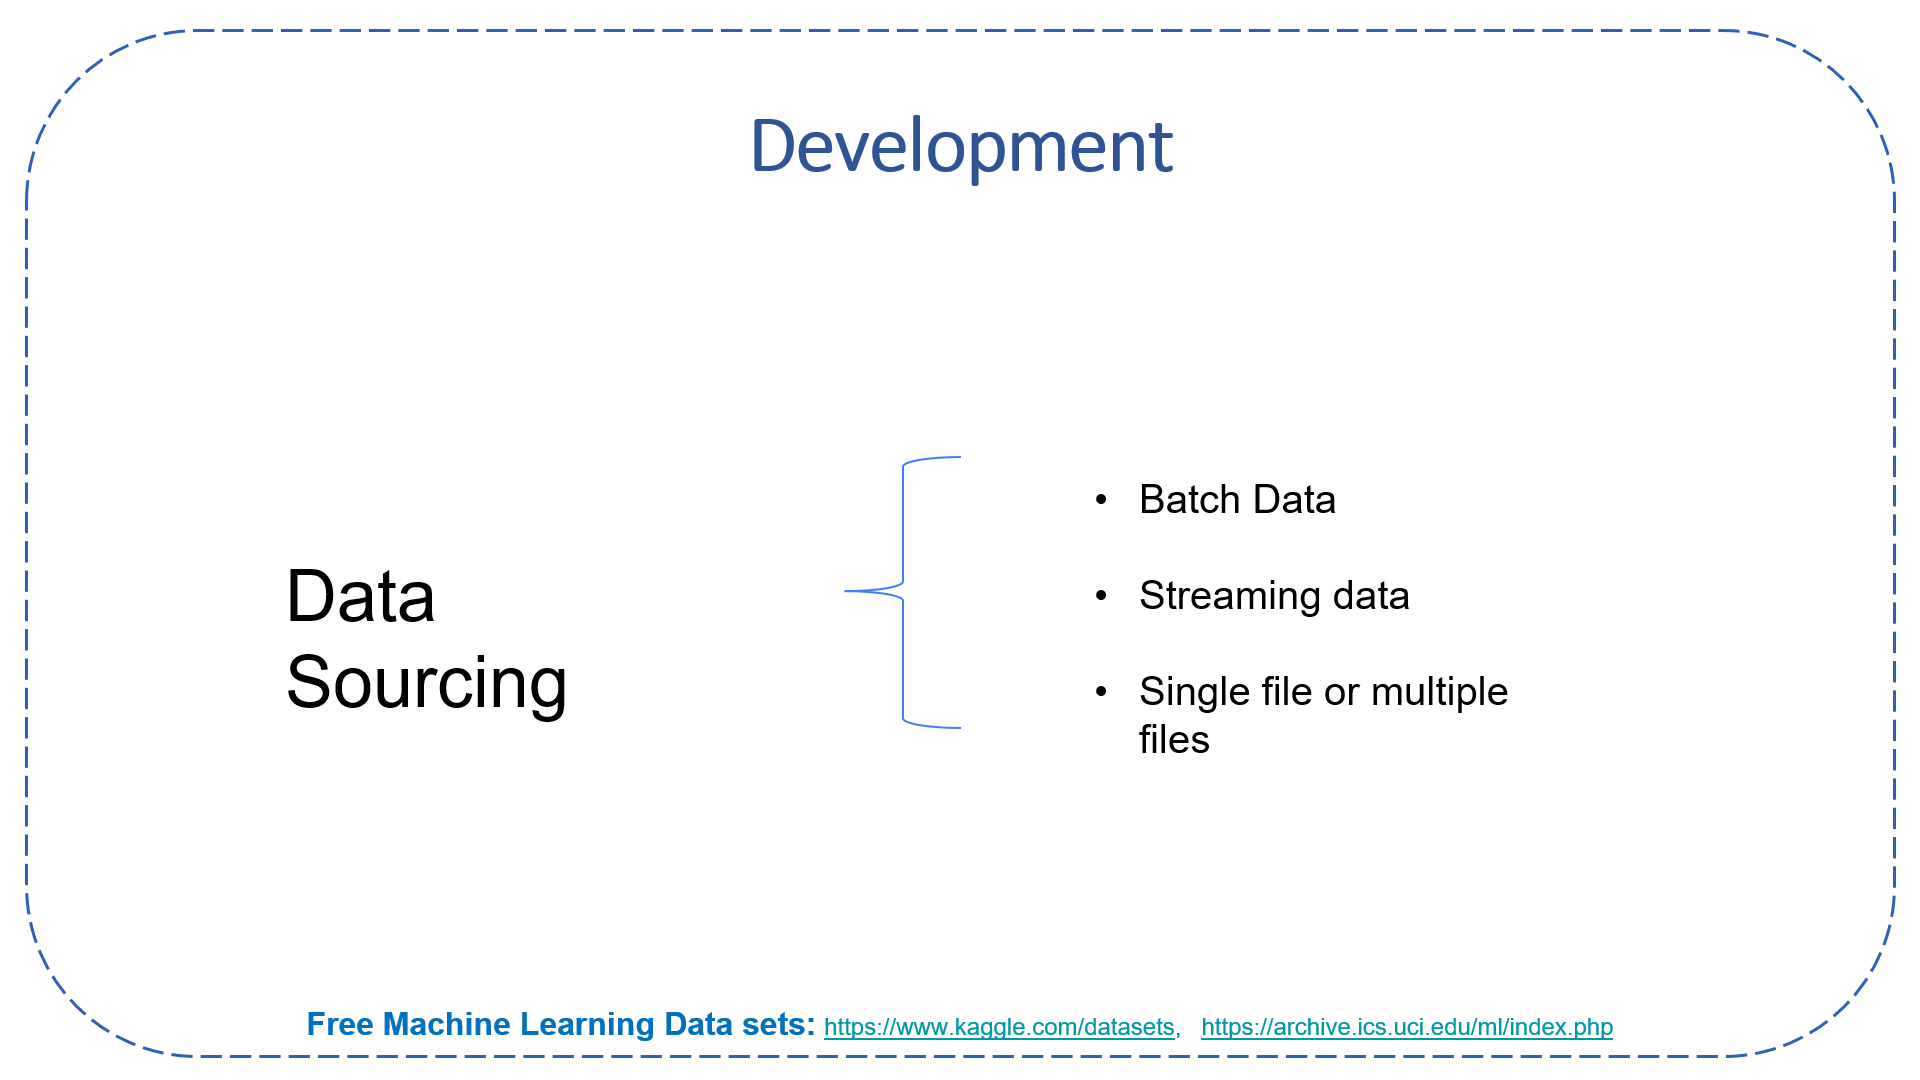

#### Data Import

In [2]:
# Data is available in Kaggle
# https://www.kaggle.com/datasets/manishmathias/myntra-fashion-dataset
data = pd.read_csv("Myntra Fasion Clothing.csv")

/tmp/ipykernel_29536/1646202422.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Myntra Fasion Clothing.csv")


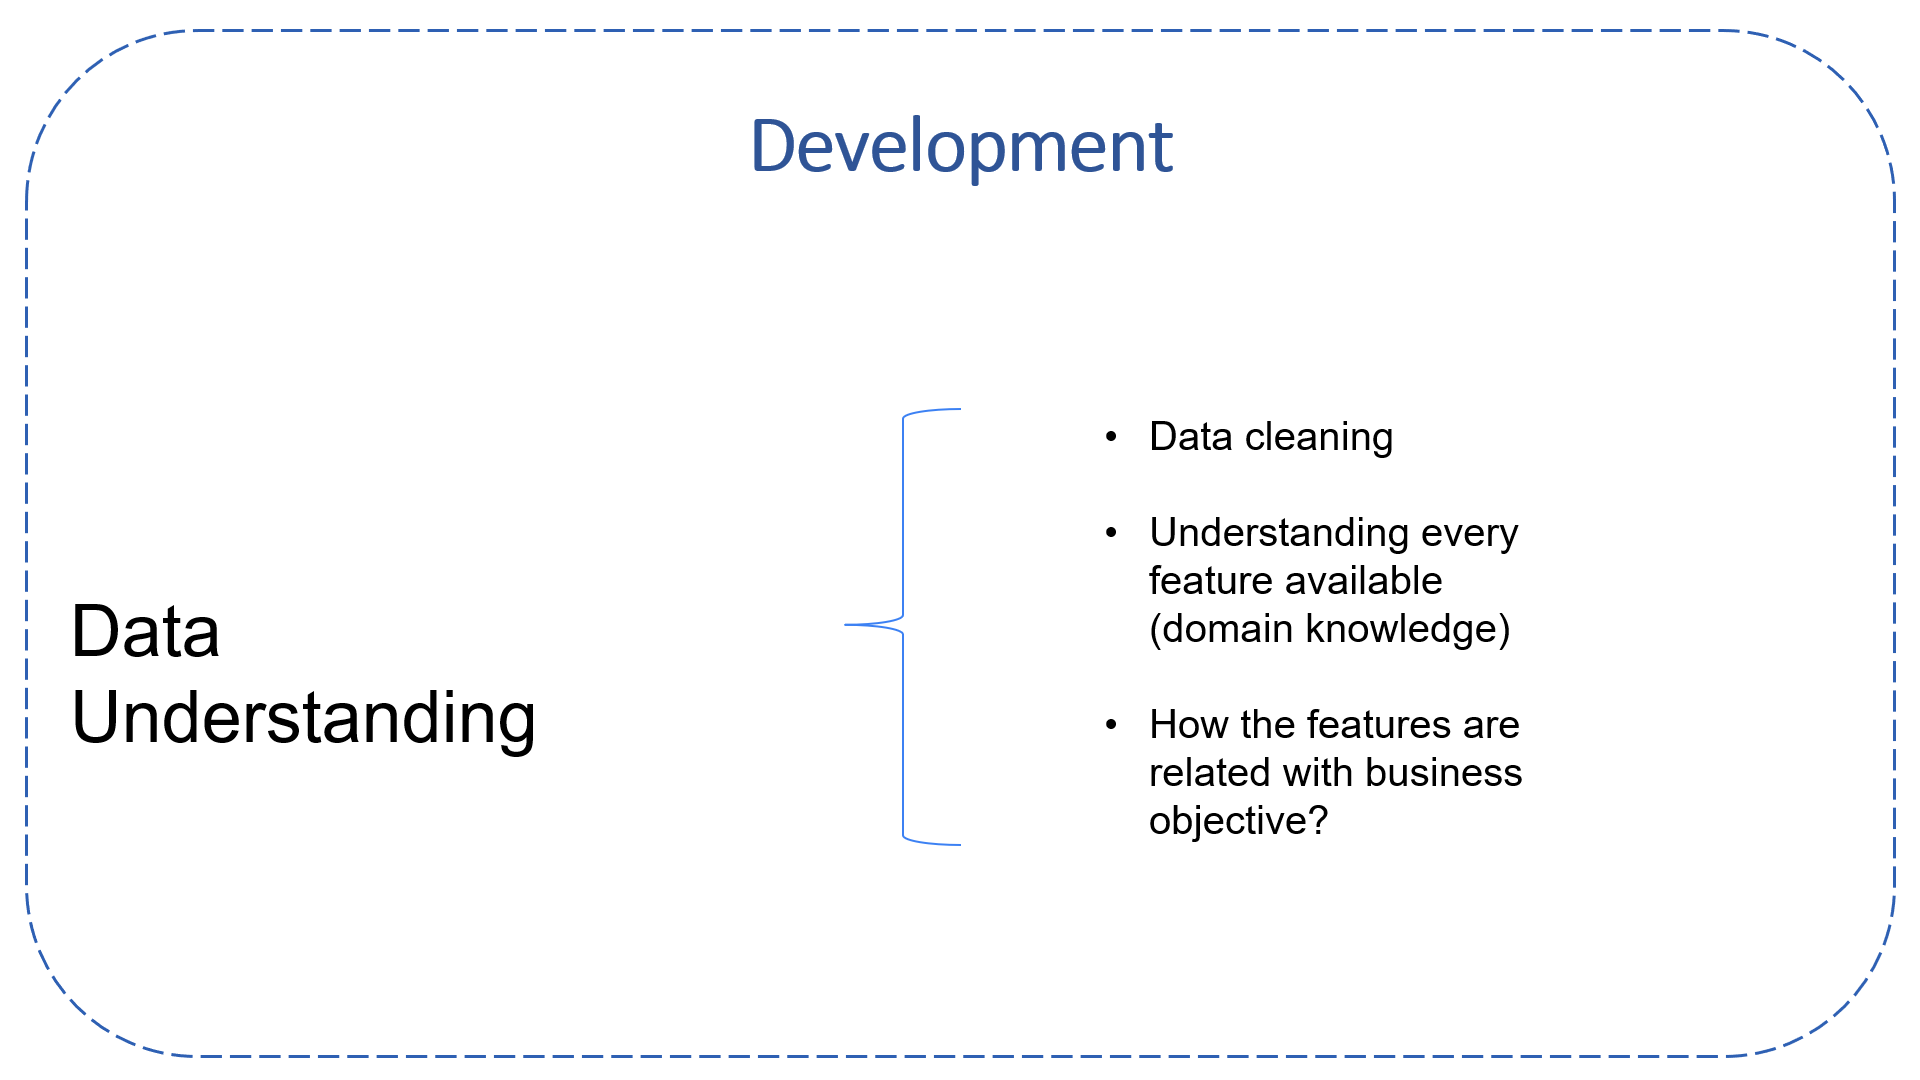

#### Understanding of the Data

In [3]:
# first two rows
data[:2]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0


In [4]:

data['URL'][0]
# URL have many information like:
# individual category/ brand name/ product detail summery/ product id
# those information we already have as a column, so we do not need to get anything from URL

'https://www.myntra.com/jeans/roadster/roadster-men-navy-blue-slim-fit-mid-rise-clean-look-jeans/2296012/buy'

In [5]:
data['URL'][1]

'https://www.myntra.com/track-pants/locomotive/locomotive-men-black--white-solid-slim-fit-track-pants/13780156/buy'

In [6]:
# Like rl, we also have many information from the description as a column value. we maynot need to use description as of now.
data['Description'][1]

'locomotive men black  white solid slim fit track pants'

In [7]:
# Let's see any products have multiple urls:
(data.groupby('Product_id')['URL'].count()>1).value_counts()

URL
False    526564
Name: count, dtype: int64

In [8]:
# checking if the data is unique at product level
print(len(data.drop_duplicates(subset = ['Product_id'])))
print(data.shape)

526564
(526564, 13)


#### Product Category understanding

In [9]:
data['category_by_Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [10]:
data.groupby('Category')['category_by_Gender'].unique()

Category
Bottom Wear                        [Men]
Indian Wear                 [Women, Men]
Inner Wear &  Sleep Wear           [Men]
Lingerie & Sleep Wear            [Women]
Plus Size                   [Women, Men]
Sports Wear                 [Men, Women]
Topwear                            [Men]
Western                          [Women]
Name: category_by_Gender, dtype: object

In [11]:
data['Category'].unique()

array(['Bottom Wear', 'Topwear', 'Lingerie & Sleep Wear', 'Western',
       'Sports Wear', 'Indian Wear', 'Plus Size',
       'Inner Wear &  Sleep Wear'], dtype=object)

In [12]:
data.groupby('Individual_category')['Category'].unique()

Individual_category
baby-dolls                              [Lingerie & Sleep Wear]
bath-robe     [Lingerie & Sleep Wear, Inner Wear &  Sleep Wear]
blazers       [Western, Indian Wear, Topwear, Plus Size, Spo...
boots                                               [Plus Size]
boxers        [Inner Wear &  Sleep Wear, Plus Size, Indian W...
                                    ...                        
trousers      [Bottom Wear, Western, Plus Size, Sports Wear,...
trunk         [Inner Wear &  Sleep Wear, Plus Size, Sports W...
tshirts       [Western, Topwear, Sports Wear, Plus Size, Ind...
tunics                                 [Indian Wear, Plus Size]
waistcoat                                [Indian Wear, Western]
Name: Category, Length: 92, dtype: object

In [13]:
data['Individual_category'].unique()

array(['jeans', 'track-pants', 'shirts', 'shapewear', 'tshirts', 'tops',
       'trousers', 'tights', 'kurta-sets', 'jumpsuit', 'kurtas', 'bra',
       'shorts', 'dresses', 'bath-robe', 'jackets', 'socks', 'briefs',
       'sweatshirts', 'sarees', 'trunk', 'kurtis', 'skirts',
       'night-suits', 'lounge-pants', 'palazzos', 'stockings', 'jeggings',
       'leggings', 'shrug', 'boxers', 'dupatta', 'tunics',
       'innerwear-vests', 'sweaters', 'lounge-shorts', 'thermal-tops',
       'capris', 'nightdress', 'pyjamas', 'sports-sandals', 'dungarees',
       'tracksuits', 'camisoles', 'nehru-jackets', 'blazers',
       'thermal-bottoms', 'lounge-tshirts', 'lehenga-choli', 'baby-dolls',
       'coats', 'thermal-set', 'saree-blouse', 'churidar',
       'dress-material', 'boots', 'lingerie-set', 'sherwani', 'co-ords',
       'flats', 'swimwear', 'rain-jacket', 'patiala', 'salwar',
       'harem-pants', 'patiala-and-dupatta', 'lingerie-accessories',
       'saree-accessories', 'suits', 'dhoti

In [14]:
data['BrandName'].unique()

array(['Roadster', 'LOCOMOTIVE', 'Zivame', ..., 'Doodlage', 'CHOZI',
       'STATUS MANTRA'], dtype=object)

In [15]:
data['Product_id'].unique()

array([ 2296012, 13780156, 11895958, ..., 17654114, 12508700, 17856544])

from above and our intuition, we can understand that category distribution is something like gender to product_id: <br>
Gender -> Category -> Individual Category -> Brand Name -> product id

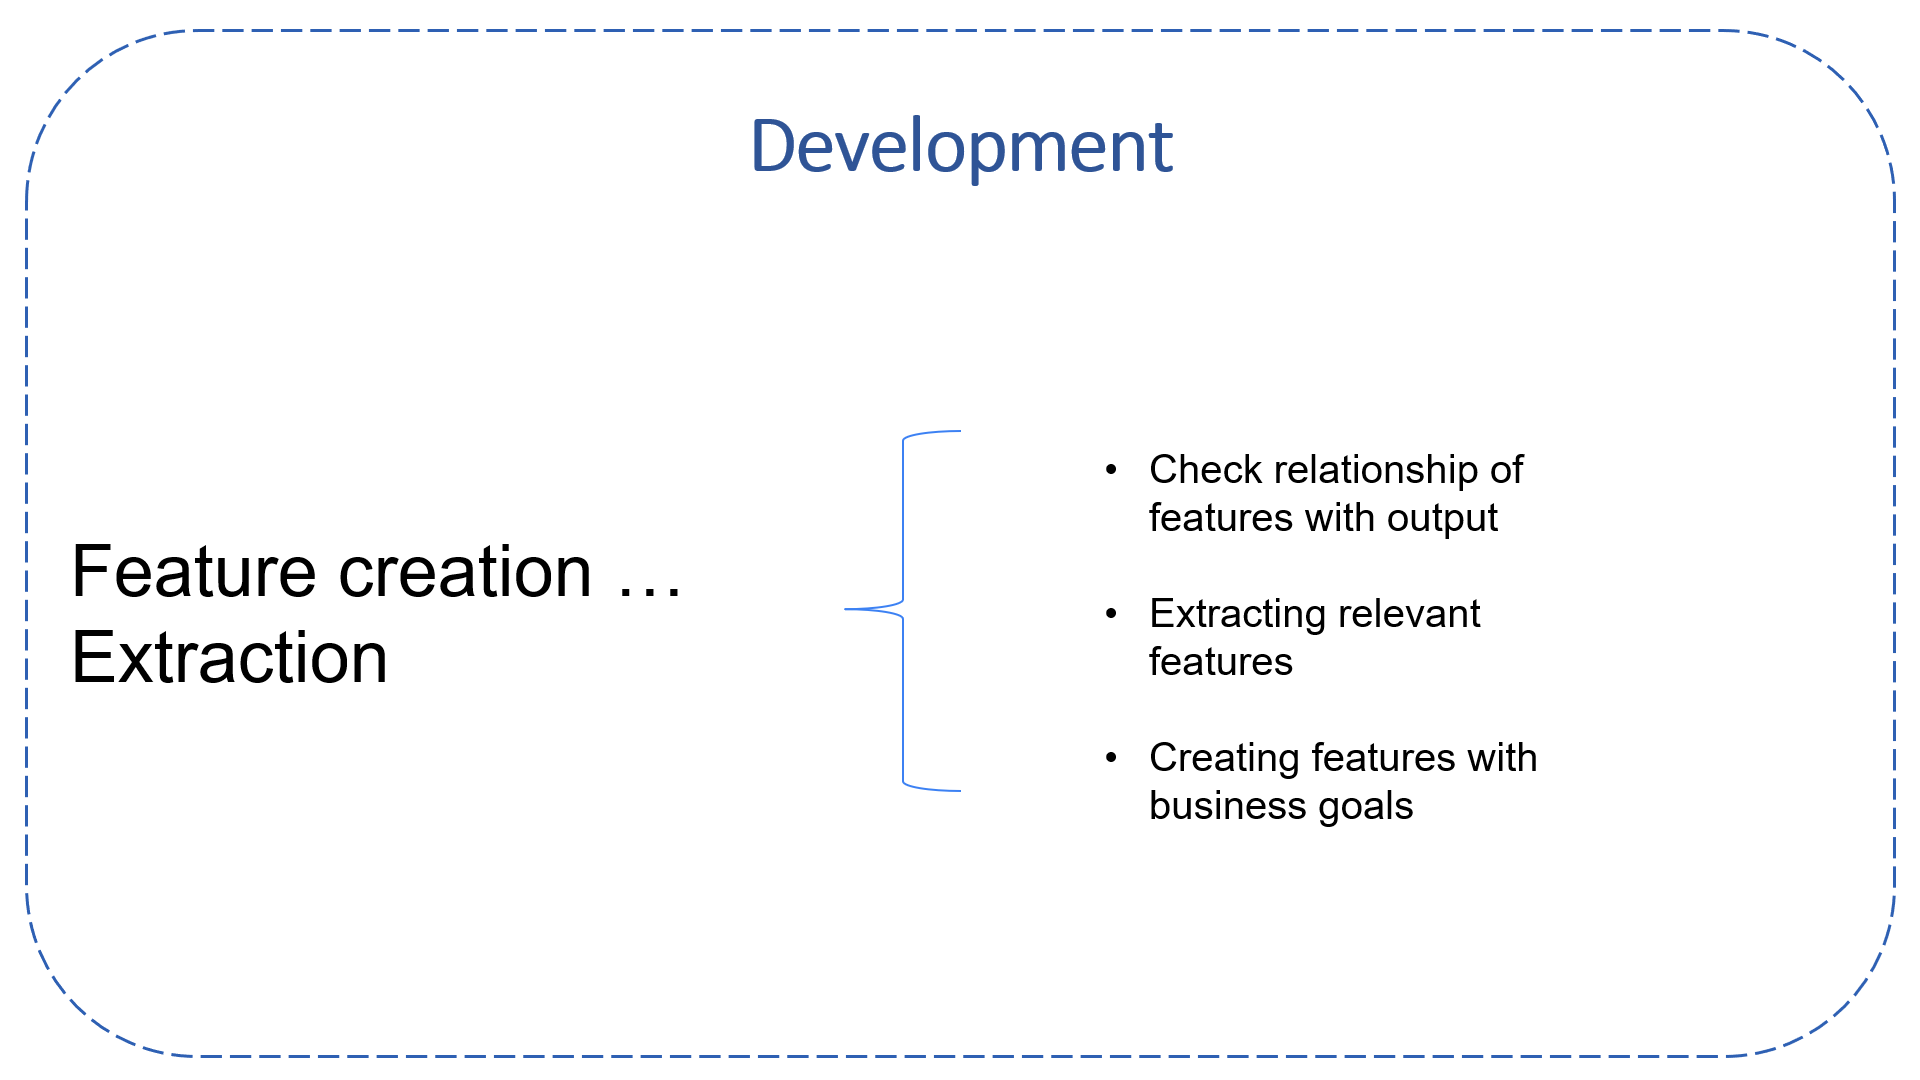

#### Finding of Correct Discount Price

In [16]:
# checking if there is anu null values in the data
print(data.isnull().sum())
print(data.isnull().mean())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64
URL                      0.000000
Product_id               0.000000
BrandName                0.000000
Category                 0.000000
Individual_category      0.000000
category_by_Gender       0.000000
Description              0.000000
DiscountPrice (in Rs)    0.366827
OriginalPrice (in Rs)    0.000000
DiscountOffer            0.141115
SizeOption               0.000000
Ratings                  0.638388
Reviews                  0.638388
dtype: float64


We can see that Discount price, discount offer, ratings and reviews have null values but interesting thing is to see here is that Discount price <br> and discount offer comes from the same logic but the number of null values are different. <br> Let's examine it

In [17]:
data[data['DiscountPrice (in Rs)'].isnull()][:3]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0


We can see that discount price column value is null but discount offer value has some value. We should take the % value as it comes because it has less null values. We will not calculate the discount offer using original and discount price column on the data where discounted price column is null.<br>
<strong>Now separating the data</strong>

In [18]:
data_DP_null = data[data['DiscountPrice (in Rs)'].isnull()]
data_DP_not_null = data[data['DiscountPrice (in Rs)'].notnull()]
print(data.shape)
print(data_DP_null.shape)
print(data_DP_not_null.shape)

(526564, 13)
(193158, 13)
(333406, 13)


<string> data_DP_null: </strong> discount price is null<br>
<string> data_DP_not_null: </strong> discount price is not null
<br> <string>We will calculate the current discount price individually and recreate the data frame through concatenation</strong>

In [19]:
# checking the data types of the data
print(data_DP_null.dtypes)

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object


In [20]:
# We need to get
data_DP_null.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74122
SizeOption                    0
Ratings                  120311
Reviews                  120311
dtype: int64

discount offer column is in object value, we have to get the numerical values from there

In [21]:
# Let's do it
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)
data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str) # need to convert numerical 0 to string
print(data_DP_null['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object


/tmp/ipykernel_29536/2863503805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].fillna(0)
/tmp/ipykernel_29536/2863503805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_null['DiscountOffer'] = data_DP_null['DiscountOffer'].astype(str) # need to convert numerical 0 to string


In [22]:
data_DP_null['DiscountOffer'].apply(lambda x: x.split('%'))

4         [35,  OFF]
5         [40,  OFF]
7         [58,  OFF]
8                [0]
9                [0]
             ...    
526559           [0]
526560           [0]
526561           [0]
526562           [0]
526563           [0]
Name: DiscountOffer, Length: 193158, dtype: object

In [23]:
# Now fetch the numerical value from discount offer
data_DP_null['discount_seg'] = data_DP_null['DiscountOffer'].apply(lambda x: x.split('%')[0])
data_DP_null['discount_seg'] = data_DP_null['discount_seg'].astype(int)

/tmp/ipykernel_29536/948040701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_null['discount_seg'] = data_DP_null['DiscountOffer'].apply(lambda x: x.split('%')[0])


ValueError: invalid literal for int() with base 10: 'Rs. 500 OFF'

We can see that when we try to convert it to integer, there is something wrong with the value. like Rs. 500 OFF. Not everything comes with % value. <br> Let's examine it

In [24]:
# Let's check the length of every value in the discount column
data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x: len(x))
data_DP_null['DiscountOffer_len'].value_counts()

/tmp/ipykernel_29536/1733919939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_null['DiscountOffer_len'] = data_DP_null['DiscountOffer'].apply(lambda x: len(x))


DiscountOffer_len
7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: count, dtype: int64

In [25]:
# filter the data to understand the different formats
print(data_DP_null[data_DP_null['DiscountOffer_len']==1]['DiscountOffer'])


8         0
9         0
11        0
17        0
20        0
         ..
526559    0
526560    0
526561    0
526562    0
526563    0
Name: DiscountOffer, Length: 74122, dtype: object


In [26]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==6]['DiscountOffer'])

1174      5% OFF
1738      2% OFF
2153      5% OFF
2415      8% OFF
2503      8% OFF
           ...  
510274    1% OFF
510275    5% OFF
510646    5% OFF
510671    1% OFF
510810    1% OFF
Name: DiscountOffer, Length: 1855, dtype: object


In [27]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==7]['DiscountOffer'])

4         35% OFF
5         40% OFF
7         58% OFF
13        50% OFF
14        60% OFF
           ...   
510807    48% OFF
510808    50% OFF
510809    50% OFF
510811    50% OFF
510812    40% OFF
Name: DiscountOffer, Length: 109474, dtype: object


In [28]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==9]['DiscountOffer'])

77         45 % OFF
527        45 % OFF
850        60 % OFF
880        45 % OFF
973        60 % OFF
            ...    
509897     41 % OFF
509901     49 % OFF
510222     45 % OFF
510248     50 % OFF
510684     45 % OFF
Name: DiscountOffer, Length: 896, dtype: object


In [29]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==10]['DiscountOffer'])

561       Rs. 38 OFF
1747      Rs. 10 OFF
3227      Rs. 15 OFF
3901      Rs. 80 OFF
6816      Rs. 33 OFF
             ...    
503178    Rs. 50 OFF
505875    Rs. 50 OFF
505968    Rs. 50 OFF
506746    Rs. 50 OFF
506748    Rs. 50 OFF
Name: DiscountOffer, Length: 158, dtype: object


In [30]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==11]['DiscountOffer'])

182       Rs. 500 OFF
199       Rs. 400 OFF
243       Rs. 300 OFF
325       Rs. 300 OFF
356       Rs. 500 OFF
             ...     
510703    Rs. 500 OFF
510704    Rs. 500 OFF
510705    Rs. 430 OFF
510708    Rs. 200 OFF
510730    Rs. 200 OFF
Name: DiscountOffer, Length: 4018, dtype: object


In [31]:
print(data_DP_null[data_DP_null['DiscountOffer_len']==12]['DiscountOffer'])

2013      Rs. 1100 OFF
2535      Rs. 1100 OFF
3188      Rs. 1100 OFF
4499      Rs. 1000 OFF
4637      Rs. 1200 OFF
              ...     
503949    Rs. 4000 OFF
503950    Rs. 4900 OFF
504004    Rs. 5100 OFF
504178    Rs. 4200 OFF
504193    Rs. 3499 OFF
Name: DiscountOffer, Length: 2635, dtype: object


There are certain values given as % and some values given as exact discount amount. <br> We have to extract exact discount values from here

In [32]:
# Let's save each values in different data frames
data1 = data_DP_null[data_DP_null['DiscountOffer_len']==1]
data6 = data_DP_null[data_DP_null['DiscountOffer_len']==6]
data7 = data_DP_null[data_DP_null['DiscountOffer_len']==7]
data9 = data_DP_null[data_DP_null['DiscountOffer_len']==9]
data10 = data_DP_null[data_DP_null['DiscountOffer_len']==10]
data11 = data_DP_null[data_DP_null['DiscountOffer_len']==11]
data12 = data_DP_null[data_DP_null['DiscountOffer_len']==12]

In [33]:
# getting the numerical values from respective data frames using different split method filteration
data1['discount_seg'] = data1['DiscountOffer'].apply(lambda x: x.split('%')[0])
data6['discount_seg'] = data6['DiscountOffer'].apply(lambda x: x.split('%')[0])
data7['discount_seg'] = data7['DiscountOffer'].apply(lambda x: x.split('%')[0])
data9['discount_seg'] = data9['DiscountOffer'].apply(lambda x: x.split('%')[0])
data10['discount_seg'] = data10['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL
data11['discount_seg'] = data11['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL
data12['discount_seg'] = data12['DiscountOffer'].apply(lambda x: (x.split('Rs.')[1]).split('OFF')[0]) # IT IS IN RUPEES VALUE OFF FROM ORIGINAL

/tmp/ipykernel_29536/497161053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['discount_seg'] = data1['DiscountOffer'].apply(lambda x: x.split('%')[0])
/tmp/ipykernel_29536/497161053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['discount_seg'] = data6['DiscountOffer'].apply(lambda x: x.split('%')[0])
/tmp/ipykernel_29536/497161053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [34]:
# now getting the discounted price in numerical format
data1['discount_seg'] = data1['discount_seg'].astype(float)
data6['discount_seg'] = data6['discount_seg'].astype(float)
data7['discount_seg'] = data7['discount_seg'].astype(float)
data9['discount_seg'] = pd.to_numeric(data9['discount_seg'],errors ='coerce')
data10['discount_seg'] = data10['discount_seg'].astype(float)
data11['discount_seg'] = data11['discount_seg'].astype(float)
data12['discount_seg'] = data12['discount_seg'].astype(float)

/tmp/ipykernel_29536/1307534690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['discount_seg'] = data1['discount_seg'].astype(float)
/tmp/ipykernel_29536/1307534690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['discount_seg'] = data6['discount_seg'].astype(float)
/tmp/ipykernel_29536/1307534690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [35]:
# Now getting the exact price of the product after discount
data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['discount_seg']
data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['discount_seg']/100)
data7['discount_seg_price'] = data7['OriginalPrice (in Rs)']-(data7['OriginalPrice (in Rs)']*data7['discount_seg']/100)
data9['discount_seg_price'] = data9['OriginalPrice (in Rs)']-(data9['OriginalPrice (in Rs)']*data9['discount_seg']/100)
data10['discount_seg_price'] = data10['OriginalPrice (in Rs)']-data10['discount_seg']
data11['discount_seg_price'] = data11['OriginalPrice (in Rs)']-data11['discount_seg']
data12['discount_seg_price'] = data12['OriginalPrice (in Rs)']-data12['discount_seg']

/tmp/ipykernel_29536/1195608839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['discount_seg_price'] = data1['OriginalPrice (in Rs)']-data1['discount_seg']
/tmp/ipykernel_29536/1195608839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['discount_seg_price'] = data6['OriginalPrice (in Rs)']-(data6['OriginalPrice (in Rs)']*data6['discount_seg']/100)
/tmp/ipykernel_29536/1195608839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [36]:
print(data_DP_null.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
discount_seg                  0
DiscountOffer_len             0
dtype: int64


In [37]:
# Now recreate the original data frame
print('before',data_DP_null.shape)
data_DP_null = pd.concat([data1,data6, data7, data9, data10, data11, data12], axis = 0)
print('after',data_DP_null.shape)

before (193158, 15)
after (193158, 16)


In [38]:
print(data_DP_null.isnull().sum())

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
discount_seg                  0
DiscountOffer_len             0
discount_seg_price            0
dtype: int64


In [39]:
data_DP_null[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','DiscountOffer','discount_seg_price']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),DiscountOffer,discount_seg_price
8,1098.0,NaN,0,1098.0
9,2749.0,NaN,0,2749.0
11,699.0,NaN,0,699.0
17,3999.0,NaN,0,3999.0
20,1298.0,NaN,0,1298.0
...,...,...,...,...
503949,7199.0,NaN,Rs. 4000 OFF,3199.0
503950,7199.0,NaN,Rs. 4900 OFF,2299.0
504004,7399.0,NaN,Rs. 5100 OFF,2299.0
504178,7599.0,NaN,Rs. 4200 OFF,3399.0


In [40]:
# lets calculate the discount_seg_% now
data_DP_null['price_diff'] = data_DP_null['OriginalPrice (in Rs)']-data_DP_null['discount_seg_price']
data_DP_null['discount_seg_%'] = round(data_DP_null['price_diff']*100/data_DP_null['OriginalPrice (in Rs)'])

In [41]:
# Now we have found the proper output variable 
data_DP_null[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','DiscountOffer','discount_seg_price','price_diff','discount_seg_%']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),DiscountOffer,discount_seg_price,price_diff,discount_seg_%
8,1098.0,NaN,0,1098.0,0.0,0.0
9,2749.0,NaN,0,2749.0,0.0,0.0
11,699.0,NaN,0,699.0,0.0,0.0
17,3999.0,NaN,0,3999.0,0.0,0.0
20,1298.0,NaN,0,1298.0,0.0,0.0
...,...,...,...,...,...,...
503949,7199.0,NaN,Rs. 4000 OFF,3199.0,4000.0,56.0
503950,7199.0,NaN,Rs. 4900 OFF,2299.0,4900.0,68.0
504004,7399.0,NaN,Rs. 5100 OFF,2299.0,5100.0,69.0
504178,7599.0,NaN,Rs. 4200 OFF,3399.0,4200.0,55.0


In [42]:
# deleting unnecessary columns
del data_DP_null['discount_seg_price']
del data_DP_null['price_diff']
del data_DP_null['DiscountOffer_len']
del data_DP_null['discount_seg']

#### Calculating the discount_seg_% columns using available data in data_DP_not_null

In [43]:
# lets calculate the discount_seg_% now
data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['DiscountPrice (in Rs)']*100/data_DP_not_null['OriginalPrice (in Rs)'])

/tmp/ipykernel_29536/1510153652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['DiscountPrice (in Rs)']*100/data_DP_not_null['OriginalPrice (in Rs)'])


In [44]:
data_DP_not_null.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
discount_seg_%           float64
dtype: object

In [45]:
# lets calculate the discount_seg_% now
data_DP_not_null['price_diff'] = data_DP_not_null['OriginalPrice (in Rs)']-data_DP_not_null['DiscountPrice (in Rs)']
data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['price_diff']*100/data_DP_not_null['OriginalPrice (in Rs)'])

/tmp/ipykernel_29536/2358004587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_not_null['price_diff'] = data_DP_not_null['OriginalPrice (in Rs)']-data_DP_not_null['DiscountPrice (in Rs)']
/tmp/ipykernel_29536/2358004587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DP_not_null['discount_seg_%'] = round(data_DP_not_null['price_diff']*100/data_DP_not_null['OriginalPrice (in Rs)'])


In [46]:
data_DP_not_null[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','price_diff','discount_seg_%']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),price_diff,discount_seg_%
0,1499.0,824.0,675.0,45.0
1,1149.0,517.0,632.0,55.0
2,1399.0,629.0,770.0,55.0
3,1295.0,893.0,402.0,31.0
6,1499.0,599.0,900.0,60.0
...,...,...,...,...
443936,1010.0,464.0,546.0,54.0
443937,1010.0,464.0,546.0,54.0
443938,1010.0,464.0,546.0,54.0
443939,1010.0,464.0,546.0,54.0


In [47]:
del data_DP_not_null['price_diff']

#### Recreating the data

In [48]:
# creating the original data again with the new column
print(data.shape)
data_new = pd.concat([data_DP_not_null,data_DP_null], axis=0)
print(data_new.shape)

(526564, 13)
(526564, 14)


In [49]:
data_new.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'discount_seg_%'],
      dtype='object')

We have succesfully created a new target column <strong>discount_seg_% </strong>which we need to predict

### Categorical feature imputation ... Feature Creation

In [50]:
data_new[:2]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_seg_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0


We can see that most of the features are categorical and we can not use them directly in the machine learning model. We have to somehow impute the categorical features with numerical values. <br> 
We can use various methods for it, but here we will use our business logic to impute

In [51]:
print(data_new.isnull().sum())
data_new['Ratings'] = data_new['Ratings'].fillna(0)
data_new['Reviews'] = data_new['Reviews'].fillna(0)

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                  336152
Reviews                  336152
discount_seg_%                0
dtype: int64


In [52]:
data_new.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                       0
Reviews                       0
discount_seg_%                0
dtype: int64

In [53]:
# Because it is male and female category is there, we can create dummy variable for the same
data_new['gender'] = pd.get_dummies(data_new['category_by_Gender'],drop_first = True).values

#### Separating data based on discount_seg_%'

In [54]:
# here 74131 records have discount price is 0 or null. Let's separate it from the data and build the model and validate the model on remaining data
print(data_new.shape)
model_data = data_new[data_new['discount_seg_%']!=0]
data_no_discount = data_new[data_new['discount_seg_%']==0]
print(model_data.shape)
print(data_no_discount.shape)

(526564, 15)
(452433, 15)
(74131, 15)


#### Before creating features we are separating data using train test plit
<strong> We are creating it here now to prevent data leakage </strong>

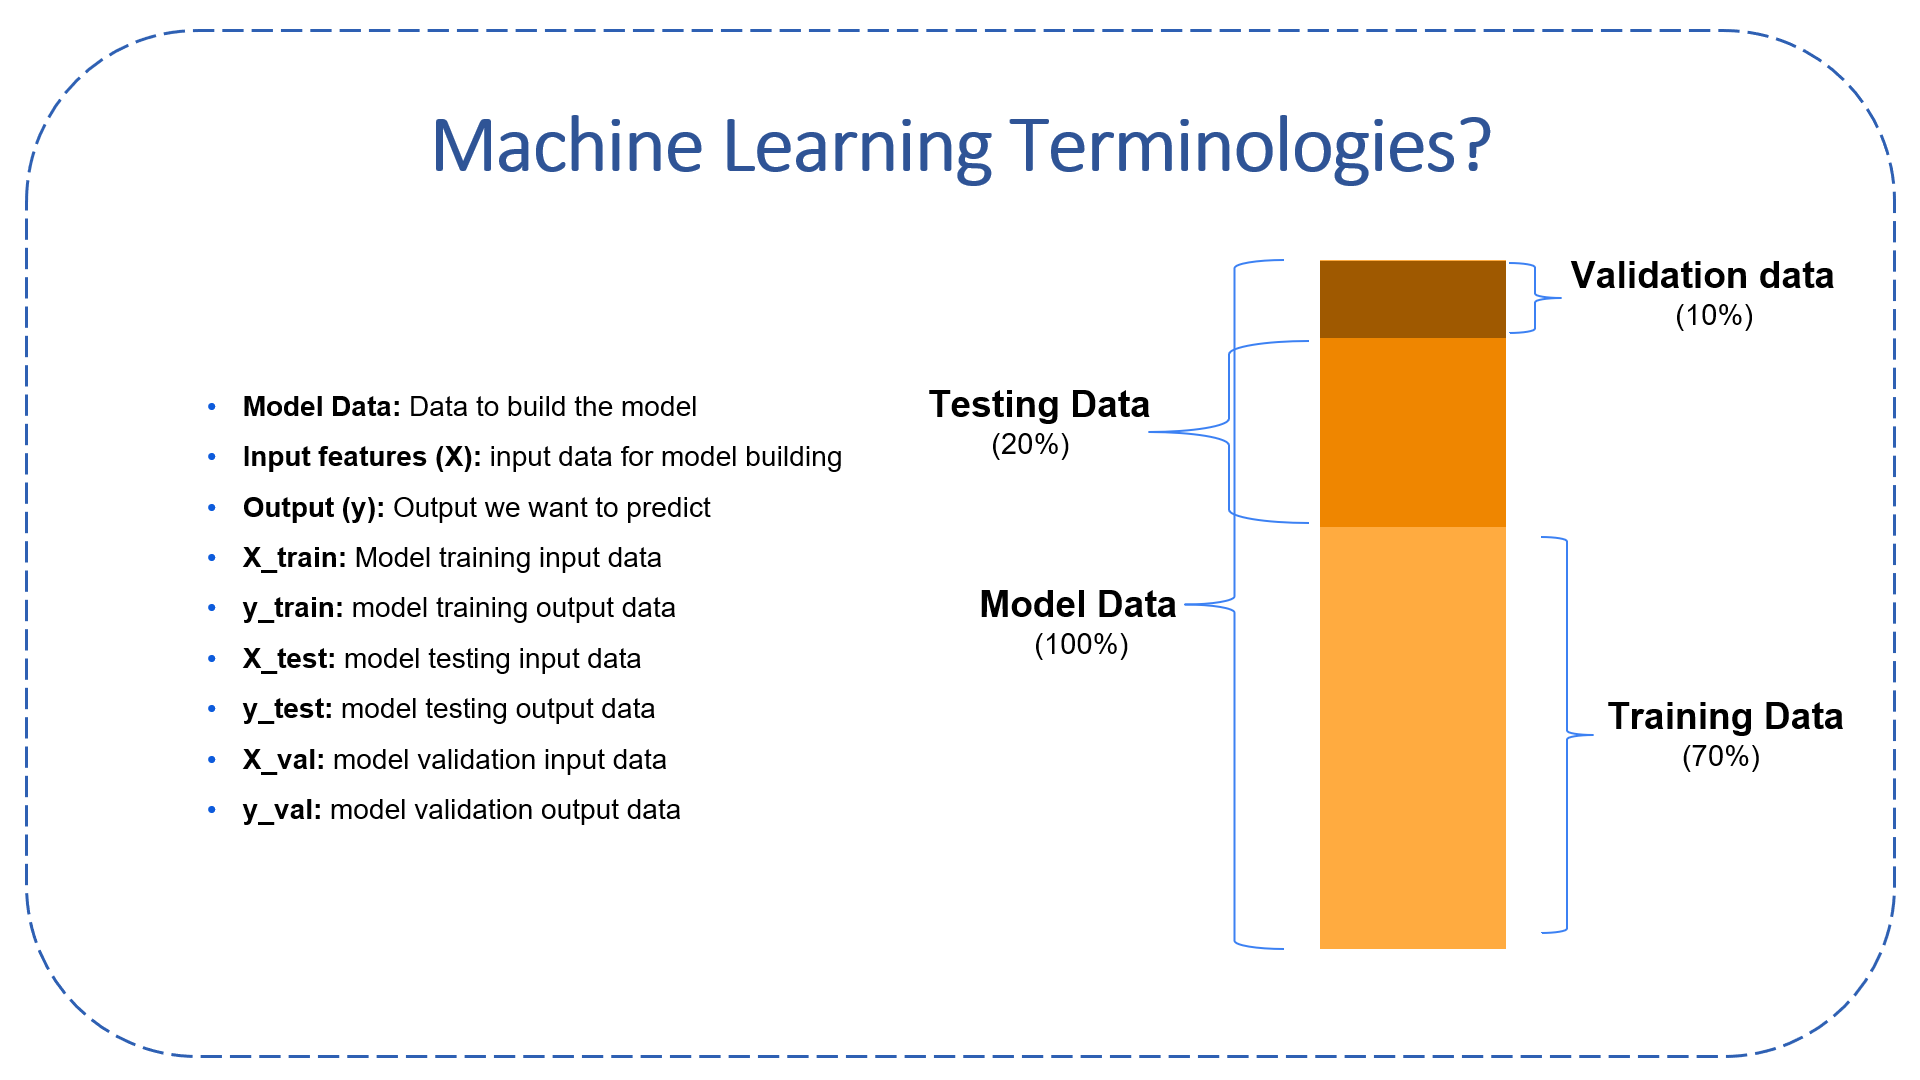

In [55]:
# creating the train, test and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(['discount_seg_%'], axis = 1), model_data['discount_seg_%'], test_size=0.33, random_state=42,shuffle=True,stratify=model_data['discount_seg_%'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

#### Using ratings and reviews to create features

<strong> Brand Importance </strong>

In [56]:
# we can see that ratings and reviews have many null values in the data but they are important for the business point of view
# Let's use them as a brand importance. If a brand have more ratings and reviews, the brand is important
# before that check how many brands have rating and how many do not have any ratings

check = X_train.groupby('BrandName')['Ratings'].mean().reset_index(name = "rating")
print('brand have ratings',check[check['rating']!=0].shape[0])
print('brand do not have ratings',check[check['rating']==0].shape[0])

brand have ratings 1318
brand do not have ratings 432


In [57]:
check = X_train.groupby('BrandName')['Reviews'].sum().reset_index(name = "review")
print('brand have reviews',check[check['review']!=0].shape[0])
print('brand do not have reviews',check[check['review']==0].shape[0])

brand have reviews 1317
brand do not have reviews 433


In [58]:
# we can use reviews and rating to create the brand importance
brand_importance = X_train.groupby('BrandName').agg({'Ratings':'mean','Reviews':'mean'}).reset_index()
brand_importance[:2]
brand_importance['brand_importance'] = brand_importance['Reviews']/brand_importance['Ratings'] # multiplying to get overall importance
brand_importance = brand_importance.fillna(0)
brand_importance

,BrandName,Ratings,Reviews,brand_importance
0,1 Stop Fashion,0.037069,0.025862,0.697674
1,109F,1.710526,2.578947,1.507692
2,20Dresses,1.010543,11.252396,11.134998
3,39 THREADS,0.000000,0.000000,0.000000
4,3PIN,0.210769,0.184615,0.875912
...,...,...,...,...
1745,urSense,1.892857,4.000000,2.113208
1746,urban undress,0.000000,0.000000,0.000000
1747,wHAT'S DOwn,0.000000,0.000000,0.000000
1748,wild U,0.505882,0.588235,1.162791


In [59]:
# Let's merge the calculated brand importance in the data. Now we can use brand importance inplace of brand name in the model
print(X_train.shape)
X_train = X_train.merge(brand_importance[['BrandName','brand_importance']], on = 'BrandName',how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(brand_importance[['BrandName','brand_importance']], on = 'BrandName',how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(brand_importance[['BrandName','brand_importance']], on = 'BrandName',how = 'left')
print(X_val.shape)

print(data_no_discount.shape)
data_no_discount = data_no_discount.merge(brand_importance[['BrandName','brand_importance']], on = 'BrandName',how = 'left')
print(data_no_discount.shape)

(203097, 14)
(203097, 15)
(149303, 14)
(149303, 15)
(100033, 14)
(100033, 15)
(74131, 15)
(74131, 16)


<strong> individual_category_popularity </strong>

In [60]:
# In the similar way we can calculate individual category popularity. From the business business point of view we can say that,
# as many brands are creating that individual category products, that much popular that individual category is
individual_category_popularity = X_train.groupby('Individual_category')['BrandName'].nunique().reset_index(name = 'ind_cat_popularity')

In [61]:
# Merging the above feature in the main data
print(X_train.shape)
X_train = X_train.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(X_val.shape)

print(data_no_discount.shape)
data_no_discount = data_no_discount.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(data_no_discount.shape)


(203097, 15)
(203097, 16)
(149303, 15)
(149303, 16)
(100033, 15)
(100033, 16)
(74131, 16)
(74131, 17)


<strong> category_popularity </strong>

In [62]:
# calculating the category popularity. Asmuch as products as category have, that much popular the category is
category_popularity = X_train.groupby('Category')['Product_id'].count().reset_index(name = 'cat_popularity')

In [63]:
# merge the same in the data
print(X_train.shape)
X_train = X_train.merge(category_popularity, on = 'Category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(category_popularity, on = 'Category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(category_popularity, on = 'Category', how = 'left')
print(X_val.shape)

print(data_no_discount.shape)
data_no_discount = data_no_discount.merge(category_popularity, on = 'Category', how = 'left')
print(data_no_discount.shape)

(203097, 16)
(203097, 17)
(149303, 16)
(149303, 17)
(100033, 16)
(100033, 17)
(74131, 17)
(74131, 18)


Since we already converted categorical features as numerical ones using our business logic, we can directly use the numerical features in the model to predict the product discount. <br> Before that we can check the correlation with the output target <strong>(discount seg %)</strong> with input features

In [64]:
# we are merging the above calculated features to the main data to analyze the importance
print(model_data.shape)
model_data = model_data.merge(brand_importance[['BrandName','brand_importance']], on = 'BrandName',how = 'left')
print(model_data.shape)
print(model_data.shape)
model_data = model_data.merge(individual_category_popularity, on = 'Individual_category', how = 'left')
print(model_data.shape)
print(model_data.shape)
model_data = model_data.merge(category_popularity, on = 'Category', how = 'left')
print(model_data.shape)

model_data['brand_importance'] = model_data['brand_importance'].fillna(0)
model_data['ind_cat_popularity'] = model_data['ind_cat_popularity'].fillna(0)
model_data['cat_popularity'] = model_data['cat_popularity'].fillna(0)

(452433, 15)
(452433, 16)
(452433, 16)


(452433, 17)
(452433, 17)
(452433, 18)


<Axes: >

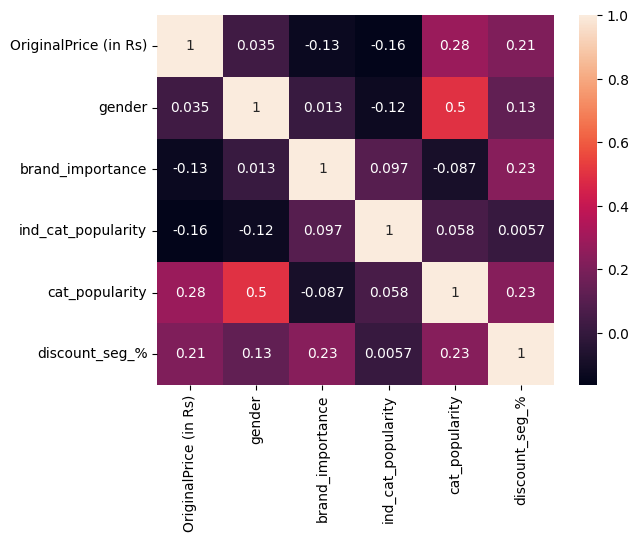

In [65]:
# checking correlation
sns.heatmap(model_data[['OriginalPrice (in Rs)','gender', 'brand_importance',
       'ind_cat_popularity', 'cat_popularity','discount_seg_%']].corr(),annot=True)

<Axes: >

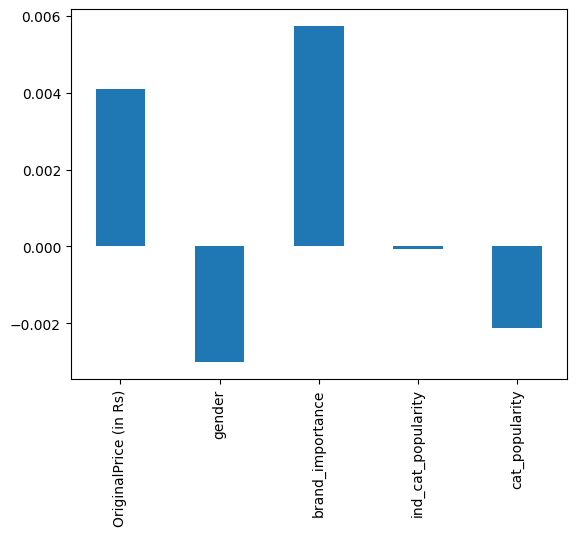

In [66]:
# Understanding correlation of input features with output target
X_train[['OriginalPrice (in Rs)','gender', 'brand_importance',
       'ind_cat_popularity', 'cat_popularity']].corrwith(y_train).plot(kind = 'bar')

From above figure we can say that the product discount is not highly correlated with any input feature
<br> Only category popularity and gender is highly correlated.

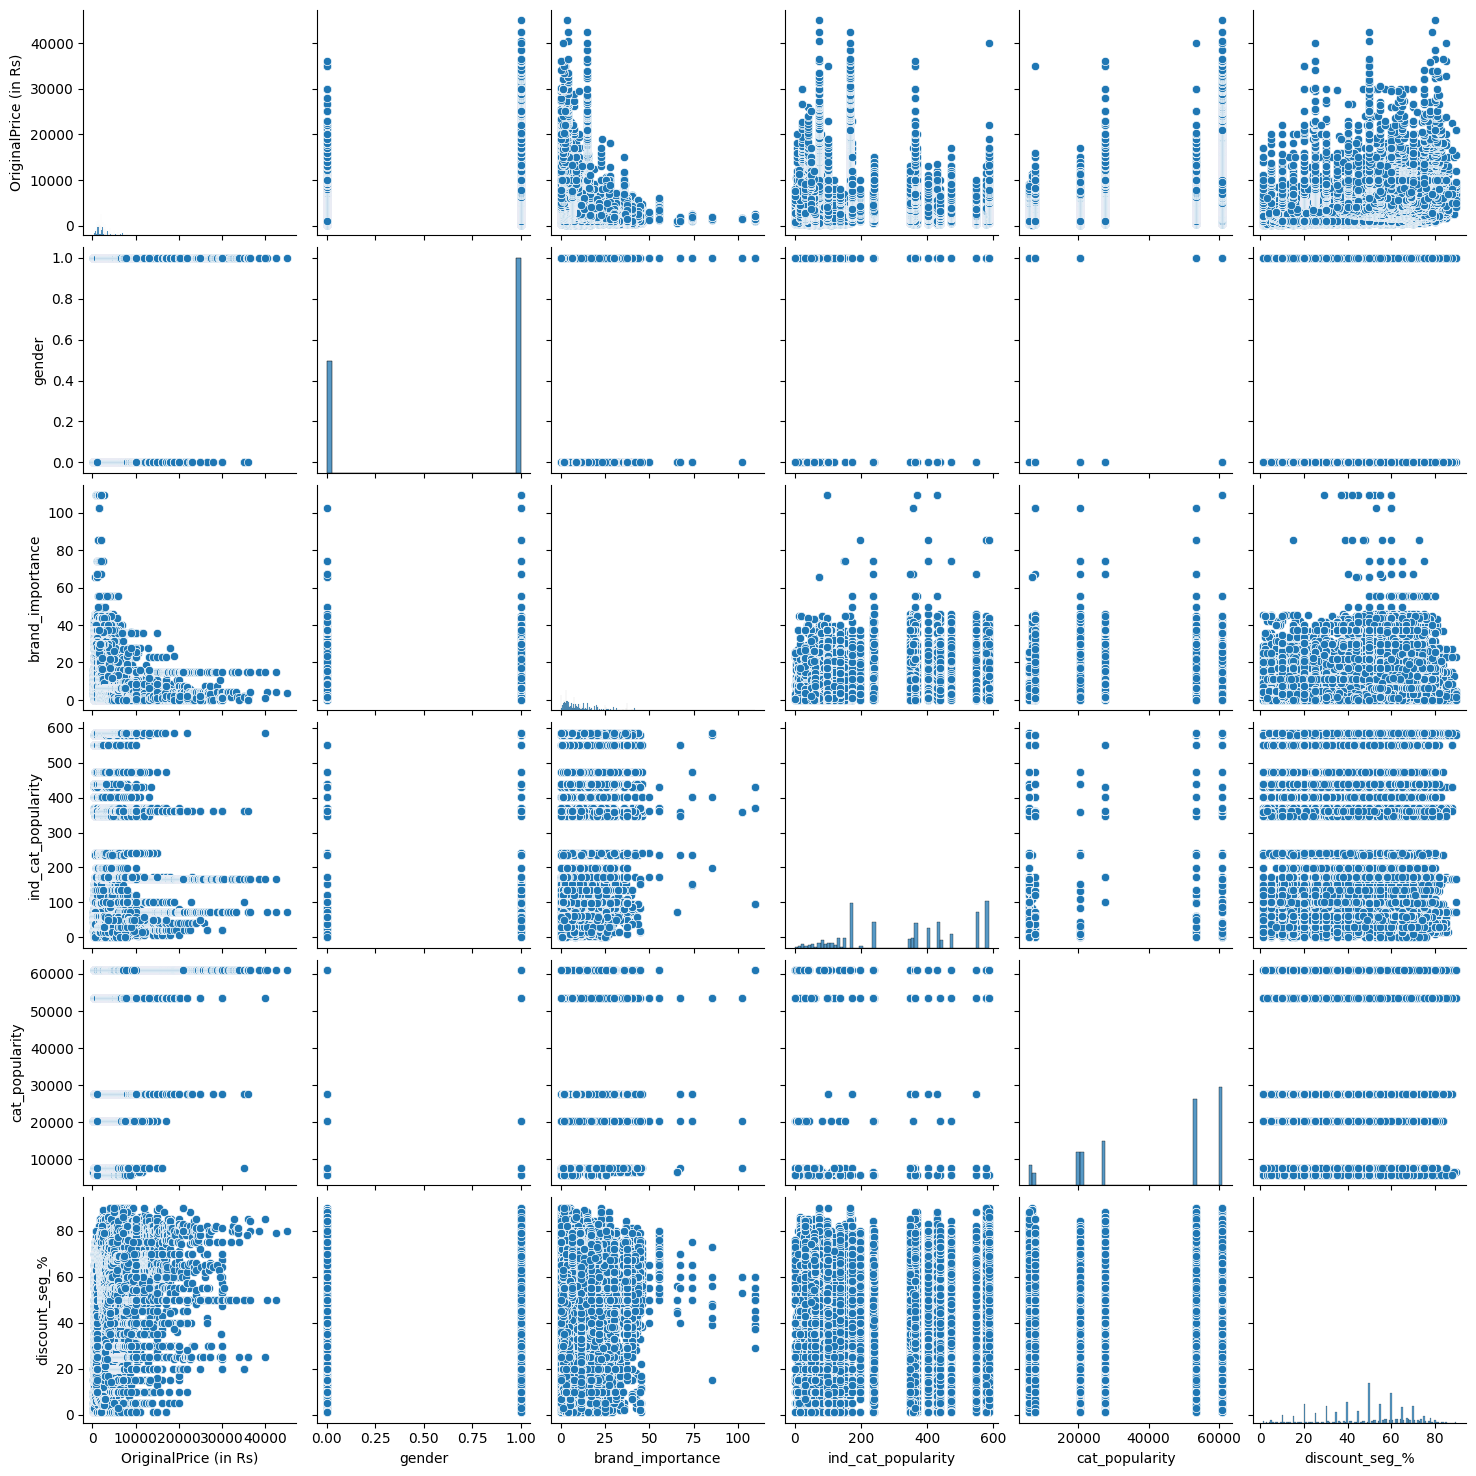

In [67]:
# Checking the pairplot to understand feature relations
sns.pairplot(model_data[['OriginalPrice (in Rs)','gender', 'brand_importance',
       'ind_cat_popularity', 'cat_popularity','discount_seg_%']])

# Let's build the base level model

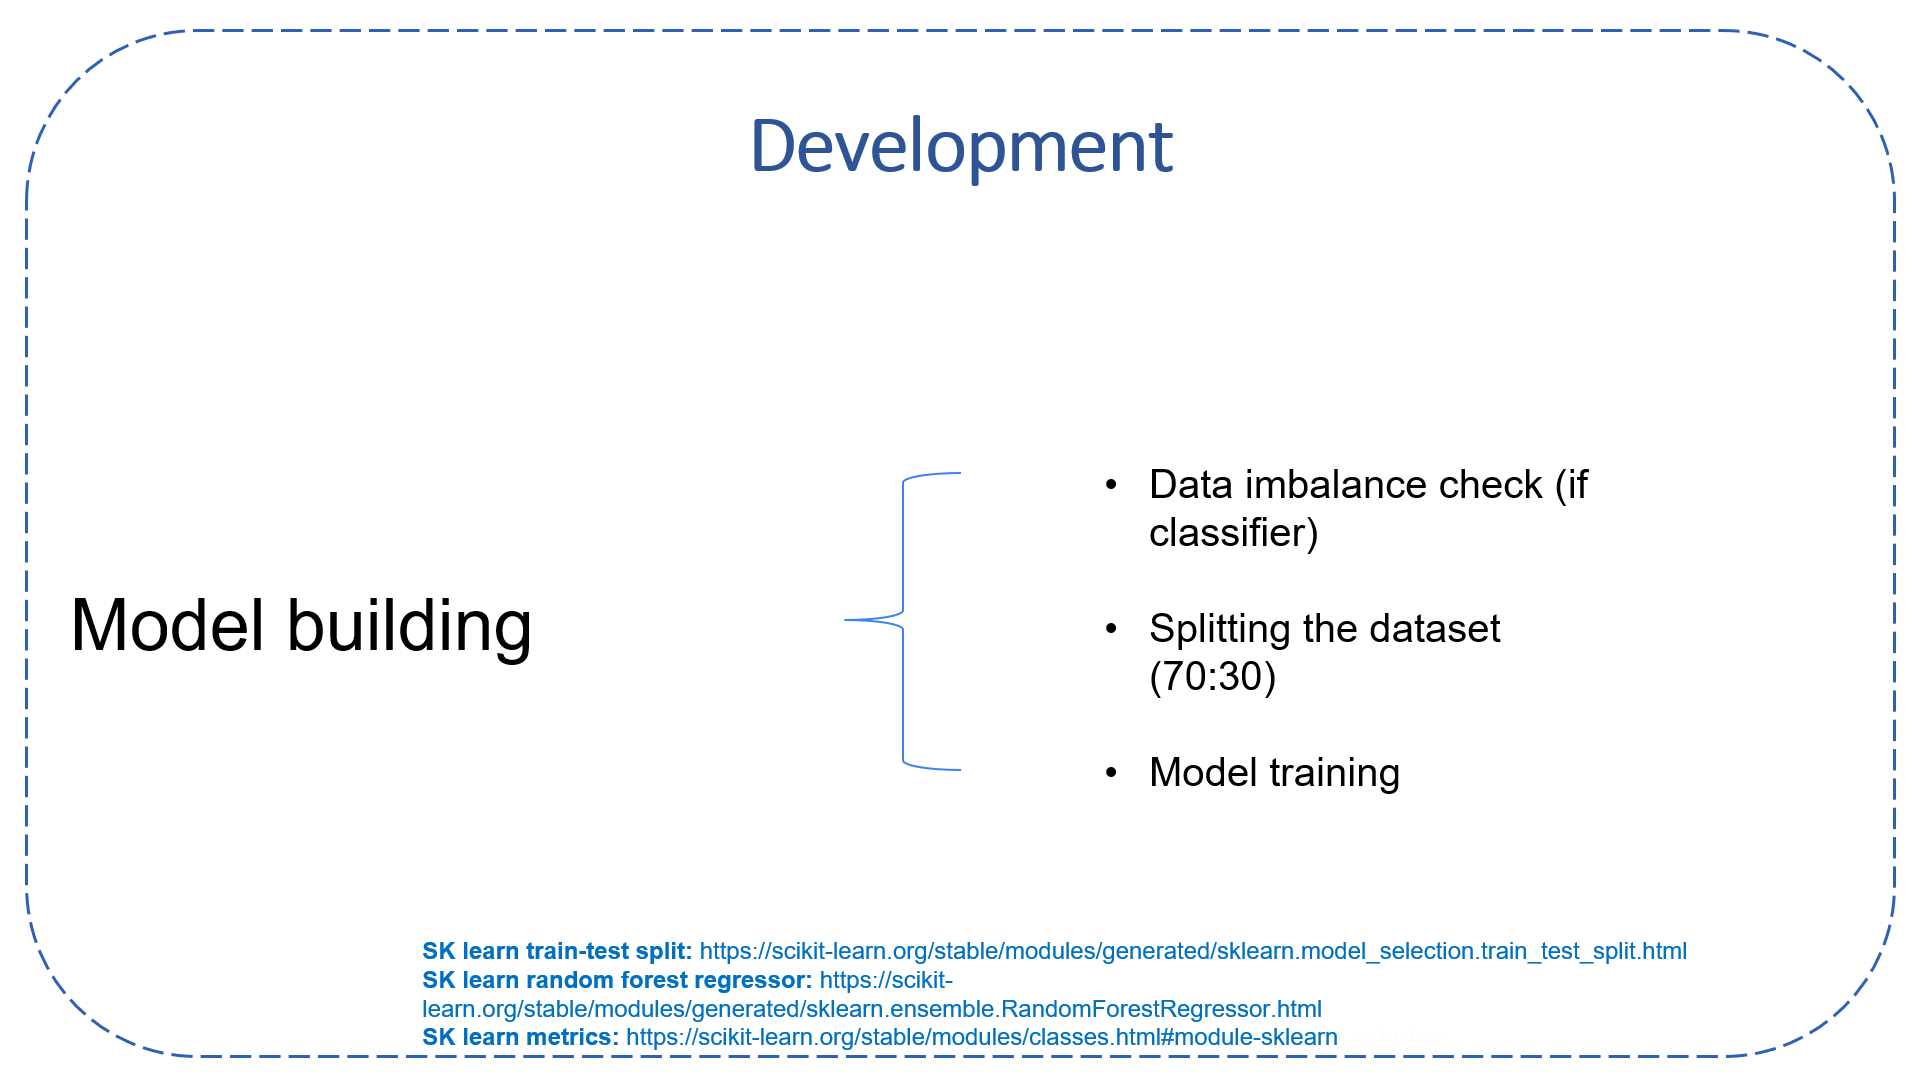

#### Selecting necessary columns for the model development

In [68]:
# checking the necessary columns
model_features = ['OriginalPrice (in Rs)','brand_importance', 'ind_cat_popularity',
       'cat_popularity', 'gender']
X_train = X_train[model_features]
X_test = X_test[model_features]
X_val = X_val[model_features]
data_no_discount = data_no_discount[model_features]

# there could be null values due to ealier categorical feature merge. like brands available in training data but not in rest data
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_val = X_val.fillna(0)
data_no_discount = data_no_discount.fillna(0)

#### Linear Regression

In [69]:
# first we start with simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [70]:
# Let's check the R2 score
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.1519273431448619
model_validation_accuracy 0.14823692917670195


#### KNN Regression

In [71]:
# now tring with KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [72]:
# Let's check the R2 score
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.6645129909324436
model_validation_accuracy 0.6623925022225299


#### Random Forest Regression

In [73]:
# Now training with random forest regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [74]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.8169334142325211
model_validation_accuracy 0.8149586219034233


In [75]:
# as of now it is giving the best results
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check

,actual,prediction
485785,27.0,34.019000
377488,60.0,41.051931
405081,25.0,31.614567
69755,60.0,56.691672
386739,50.0,74.271086
...,...,...
199982,35.0,32.608414
349241,70.0,70.354065
150383,70.0,64.255000
397742,65.0,64.776625


In [76]:
val_check = pd.DataFrame()
val_check['actual'] = y_val
val_check['prediction'] = y_val_predict
val_check

,actual,prediction
167632,60.0,49.603837
65912,70.0,63.271321
418337,56.0,56.000000
9271,45.0,53.907469
259034,62.0,57.328742
...,...,...
416051,50.0,50.000000
218271,62.0,41.049603
43281,40.0,44.577739
489168,65.0,65.000000


# Understanding of Features

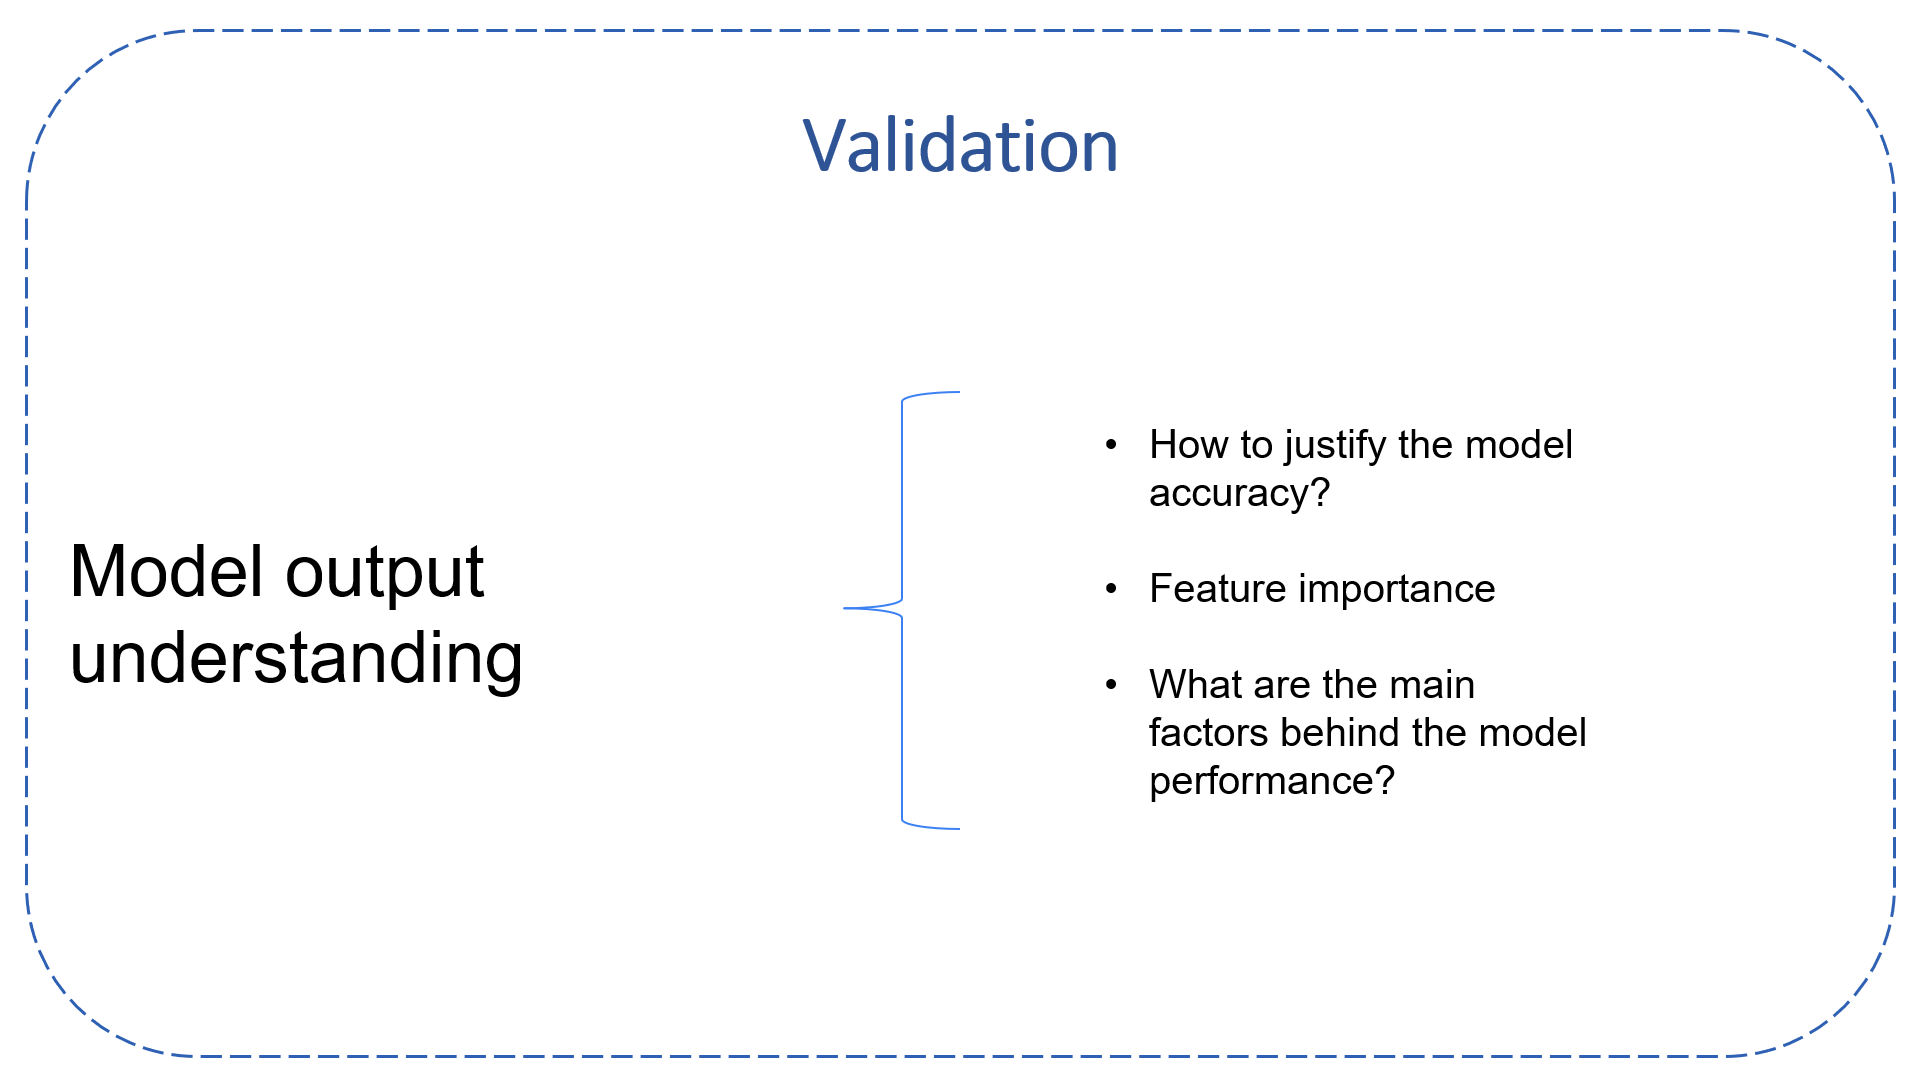

<Axes: xlabel='Feature'>

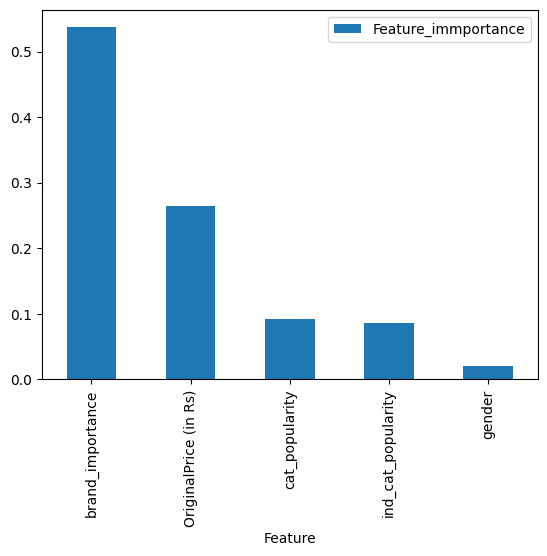

In [77]:
# Feature Importance
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_test.columns
feature_importance['Feature_immportance'] = model.feature_importances_
feature_importance = feature_importance.sort_values(by='Feature_immportance', ascending=False)
feature_importance.set_index('Feature').plot(kind = 'bar')

# Prdicting on Unknown data

In [78]:
# predicting discount price on the data where discount is not available in the dataset
data_no_discount = data_no_discount[X_train.columns] # rearranging columns
data_no_discount['discount_prediction'] = model.predict(data_no_discount)
data_no_discount

,OriginalPrice (in Rs),brand_importance,ind_cat_popularity,cat_popularity,gender,discount_prediction
0,600.0,5.399240,133.0,20426,True,29.286905
1,2499.0,4.202719,431.0,61037,True,52.166108
2,2499.0,4.202719,431.0,61037,True,52.166108
3,2499.0,4.202719,431.0,61037,True,52.166108
4,2499.0,4.202719,431.0,61037,True,52.166108
...,...,...,...,...,...,...
74126,9999.0,5.214900,173.0,53519,True,62.273333
74127,9999.0,5.214900,363.0,53519,True,55.460000
74128,9999.0,0.000000,586.0,53519,True,38.650000
74129,9999.0,0.000000,586.0,53519,True,38.650000


Similar to above we can predict for many products and the model will predict the probable discount on the product

# Can log scale change model performance?

<Axes: xlabel='OriginalPrice (in Rs)', ylabel='Density'>

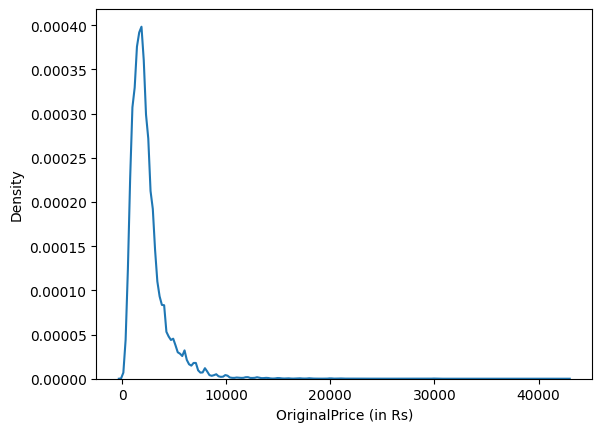

In [79]:
sns.kdeplot(data=X_train, x="OriginalPrice (in Rs)")

<Axes: xlabel='brand_importance', ylabel='Density'>

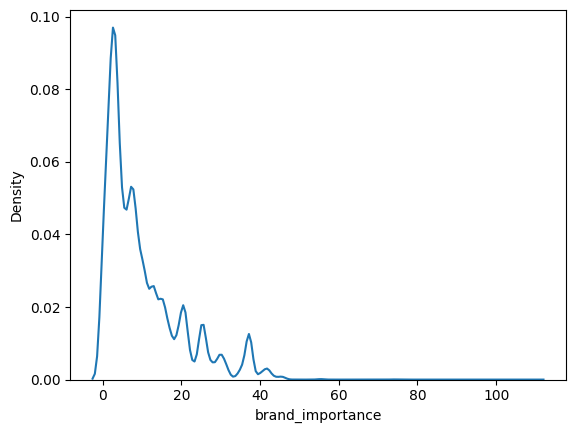

In [80]:
sns.kdeplot(data=X_train, x="brand_importance")

<Axes: xlabel='cat_popularity', ylabel='Density'>

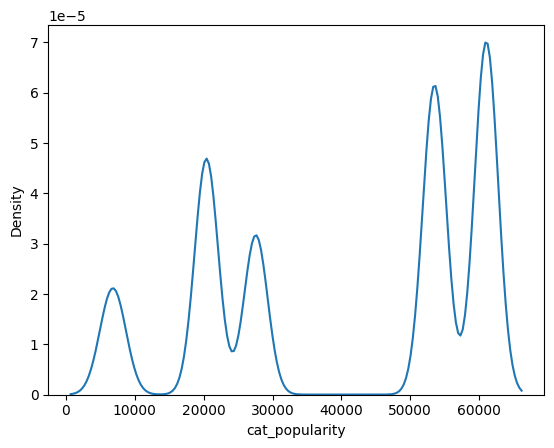

In [81]:
sns.kdeplot(data=X_train, x="cat_popularity")

<Axes: xlabel='ind_cat_popularity', ylabel='Density'>

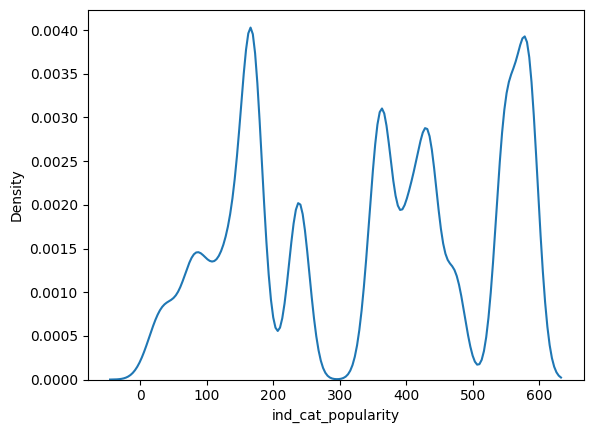

In [82]:
sns.kdeplot(data=X_train, x="ind_cat_popularity")

In [83]:
# The Feature column covers a huge range. Convert to log-space.
eps = 0.001
X_train['brand_importance'] = np.log(X_train.pop('brand_importance')+eps)
X_train['OriginalPrice (in Rs)'] = np.log(X_train.pop('OriginalPrice (in Rs)')+eps)
X_train['cat_popularity'] = np.log(X_train.pop('cat_popularity')+eps)
X_train['ind_cat_popularity'] = np.log(X_train.pop('ind_cat_popularity')+eps)

X_test['brand_importance'] = np.log(X_test.pop('brand_importance')+eps)
X_test['OriginalPrice (in Rs)'] = np.log(X_test.pop('OriginalPrice (in Rs)')+eps)
X_test['cat_popularity'] = np.log(X_test.pop('cat_popularity')+eps)
X_test['ind_cat_popularity'] = np.log(X_test.pop('ind_cat_popularity')+eps)

X_val['brand_importance'] = np.log(X_val.pop('brand_importance')+eps)
X_val['OriginalPrice (in Rs)'] = np.log(X_val.pop('OriginalPrice (in Rs)')+eps)
X_val['cat_popularity'] = np.log(X_val.pop('cat_popularity')+eps)
X_val['ind_cat_popularity'] = np.log(X_val.pop('ind_cat_popularity')+eps)

<Axes: xlabel='OriginalPrice (in Rs)', ylabel='Density'>

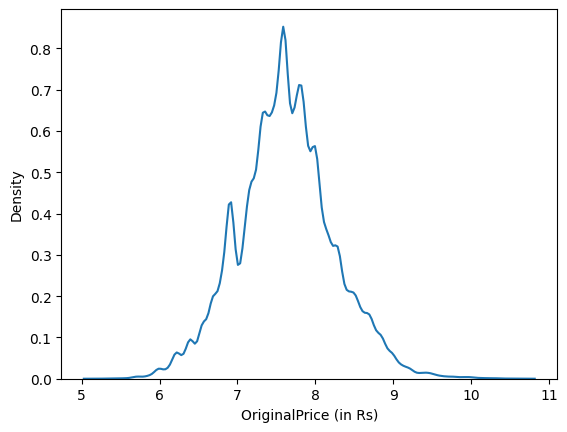

In [84]:
sns.kdeplot(data=X_train, x="OriginalPrice (in Rs)")

<Axes: xlabel='brand_importance', ylabel='Density'>

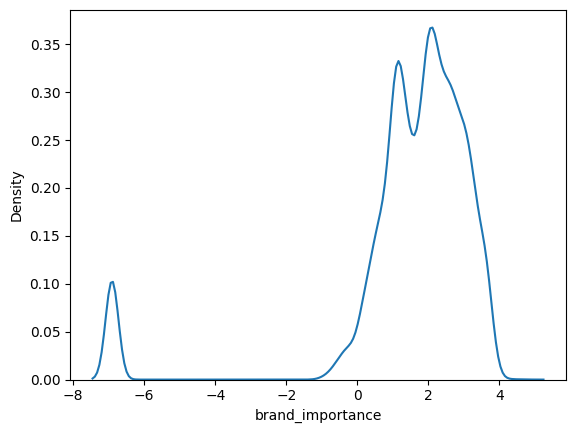

In [85]:
sns.kdeplot(data=X_train, x="brand_importance")

In [86]:
# first we start with simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [87]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.1486031180275892
model_validation_accuracy 0.14634039110311625


In [88]:
# now tring with KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [89]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.7166447911362456
model_validation_accuracy 0.7140454682856829


In [90]:
# Now training with random forest regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [91]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.8168706534846795
model_validation_accuracy 0.8153609068669522


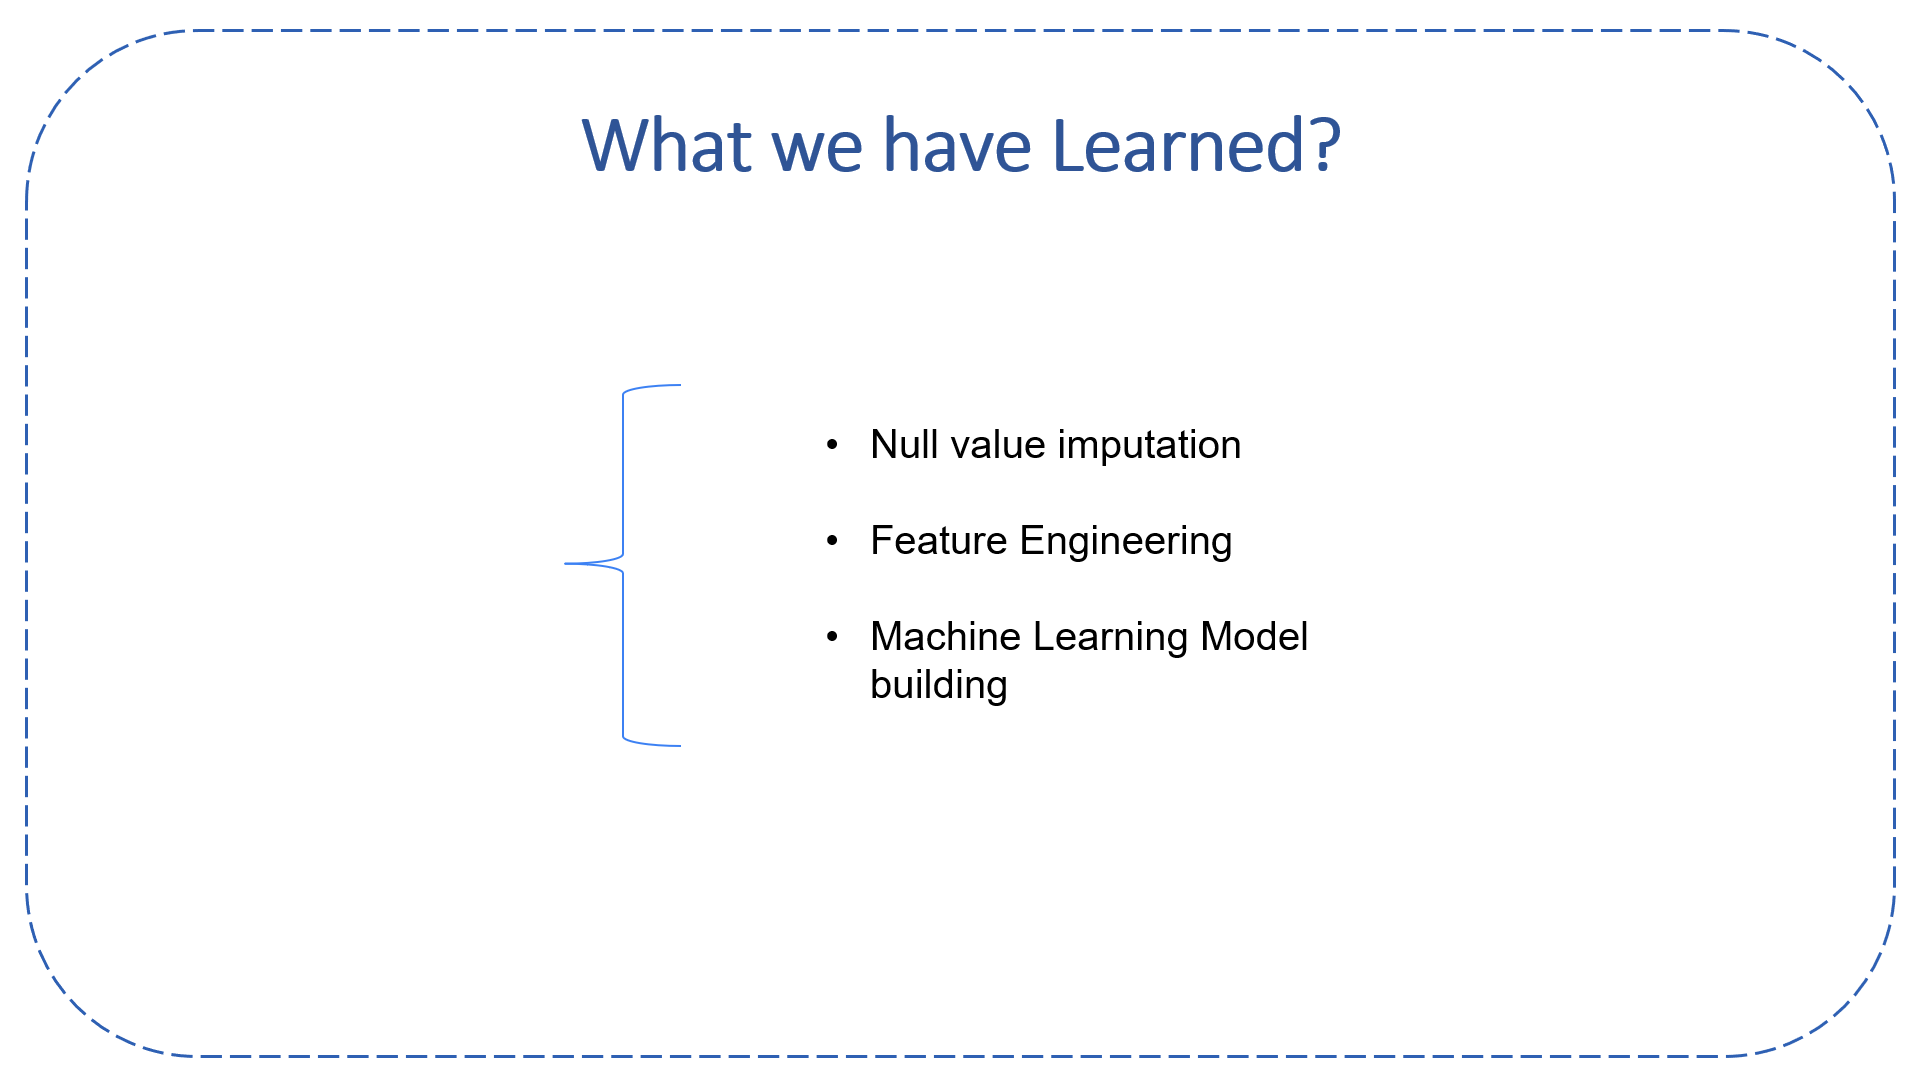

<strong>My Social Media:<br>
LinkedIn: </strong>https://www.linkedin.com/in/soumyabratar/<br>
<strong>YouTube:</strong> https://www.youtube.com/@DataDrivenDecision <br>
<strong>GitHub: </strong>https://github.com/soumyabrataroy <br>
<strong>Medium: </strong>https://medium.com/@soumyabrataroy <br>